In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
from PIL import Image
import numpy as np
from os import listdir
from os.path import isfile, join
import skimage
import skimage.io
import math
import fnmatch

In [11]:
folder = '/Volumes/Aortas/Aorta/segmentations/constitutiveRainbow/P9/nuclei/aorta6'
files = [f for f in listdir(folder) if isfile(join(folder, f)) if "._" not in f]

In [12]:
pathImage = "/Volumes/Aortas/Aorta/rawImage/Rainbow/constitutive/cropped3intercostal/P9-P10/210911_P9-_aorta6_nuclei.tif"
pic = skimage.io.imread(pathImage)

In [22]:
fullImage = Image.new('RGB', (pic.shape[1], pic.shape[0]))

In [23]:
pattern = "*" + str(1) + "_*"
fileFiltered = fnmatch.filter(files, pattern)
dat = np.load(join(folder,fileFiltered[0]), allow_pickle = True).item()
file1Shape = dat['masks'].shape

In [24]:
max = - math.inf
min = math.inf

for i in range(16):
    dat = np.load(join(folder, files[i]), allow_pickle = True).item()
    if np.max(dat['img']) > max:
        max = np.max(dat['img'])
    if np.min(dat['img']) < min:
        min = np.min(dat['img'])

In [25]:
max = 1000

In [26]:
for i in range(4):
    for j in range(4):
        number = i*4 + (j+1)
        pattern = "*-" + str(number) + "_*"
        fileFiltered = fnmatch.filter(files, pattern)
        dat = np.load(join(folder,fileFiltered[0]), allow_pickle = True).item()
        #img_normalized = img_as_ubyte(exposure.rescale_intensity(dat['img'], in_range = (min, max)))
        #img = Image.fromarray(img_normalized)
        img = Image.fromarray(dat['img'])
        imgGray = img.convert('L')
        imgGrayarray = np.asarray(imgGray)
        rgb = mask_overlay(imgGrayarray, dat['masks'], colors=None)
        image = Image.fromarray(rgb)
        fullImage.paste(im=image, box=((j*file1Shape[1]), (i*file1Shape[0])))

In [31]:
dat = np.load("/Volumes/Aortas/Aorta/rawImage/Rainbow/constitutive/cropped3intercostal/P9-P10/210911_P9-aorta6_blue_seg.npy", allow_pickle=True).item()

In [33]:
img = Image.fromarray(dat['img'])
imgGray = img.convert('L')
imgGrayarray = np.asarray(imgGray)
rgb = mask_overlay(imgGrayarray, dat['masks'], colors=None)
image = Image.fromarray(rgb)

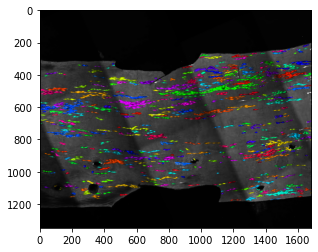

In [34]:
plt.imshow(image)

In [35]:
savePath = "/Volumes/Aortas/Aorta/plots/fullAorta"
image.save(join(savePath, "constRainbowBlueSegmP9Aorta6.png"))

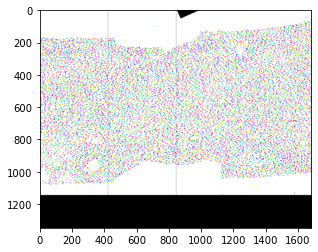

In [27]:
plt.imshow(fullImage)

In [28]:
savePath = "/Volumes/Aortas/Aorta/plots/fullAorta"
fullImage.save(join(savePath, "constRainbowNucleiSegmP9Aorta6.png"))